In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [134]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
transactions_data = pd.read_csv('transactions.csv')
customer_data = pd.read_csv('customer.csv')
#income_data = pd.read_csv('income_group.csv')

In [ ]:
# Merge train and test data with transactions and customer data
train_data = pd.merge(train_data, transactions_data, on='CUSTOMER_IDENTIFIER', how='left')
test_data = pd.merge(test_data, transactions_data, on='CUSTOMER_IDENTIFIER', how='left')

train_data = pd.merge(train_data, customer_data, on='CUSTOMER_IDENTIFIER', how='left')
test_data = pd.merge(test_data, customer_data, on='CUSTOMER_IDENTIFIER', how='left')



In [136]:
print('nulls on train_data:',train_data.isna().sum())

print('duplicates on train data:',train_data.duplicated().sum())

nulls on train_data: CUSTOMER_IDENTIFIER              0
RECORD_DATE_x                    0
DECLARED_NET_INCOME              0
TRANSACTION_DESCRIPTION     263684
RECORD_DATE_y                    0
ACCOUNT_TYPE_CODE                0
ACCOUNT_BALANCE                  0
AMT                              0
EVENT_NUMBER                     0
PRODUCT_CODE                     0
CHANNEL                          0
ACCOUNT_NUMBER                   0
TRANSACTION_REFERENCE       263684
DATE_LAST_UPDATED                0
SEX_CODE                         0
INCOME_GROUP_CODE                0
NUMBER_OF_ACCOUNTS               0
OCCUPATIONAL_STATUS_CODE         0
AGE                              0
dtype: int64
duplicates on train data: 0


In [137]:
train_data['TRANSACTION_DESCRIPTION'].fillna('NO DESCRIPTION', inplace=True)
train_data['TRANSACTION_REFERENCE'].fillna('NO DESCRIPTION', inplace=True)
train_data.head().head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,DECLARED_NET_INCOME,TRANSACTION_DESCRIPTION,RECORD_DATE_y,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500",ATM WITHDRAWAL,2022-07-21 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,35789.84,-5000.0,110,CHEQ,atm,ef3feb4f3a73818fce9e49282f40d9b48e933ff178a2ff...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45
1,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500",ATM WITHDRAWAL,2022-06-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,825.00,-4000.0,73,CHEQ,atm,ef3feb4f3a73818fce9e49282f40d9b48e933ff178a2ff...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45
2,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500",ATM TRANSFER,2022-06-29 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,4825.00,4825.0,72,CHEQ,atm,ef3feb4f3a73818fce9e49282f40d9b48e933ff178a2ff...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45
3,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500",ATM WITHDRAWAL,2022-07-21 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,36789.84,-4000.0,112,CHEQ,atm,ef3feb4f3a73818fce9e49282f40d9b48e933ff178a2ff...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45
4,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500",ATM WITHDRAWAL,2022-07-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,28789.84,-4000.0,115,CHEQ,atm,ef3feb4f3a73818fce9e49282f40d9b48e933ff178a2ff...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45


In [138]:
test_data.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,TRANSACTION_DESCRIPTION,RECORD_DATE_y,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,ATM WITHDRAWAL,2022-06-17 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,700.00,-300.0,71,CHEQ,atm,9cd783e94d02ac9b1c90a3f738c404d0c5e7dff06929d6...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-09,1,17,19,1,28
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,IMMEDIATE TRF CR,2022-06-10 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,1000.00,1000.0,59,CHEQ,teller,9cd783e94d02ac9b1c90a3f738c404d0c5e7dff06929d6...,ab5a17b38c5ccd67d7d3c0d4cac01fcc94668a8dc3ebb2...,2022-09,1,17,19,1,28
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,AIRTIME DEBIT,2021-08-25 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,14063.06,-25.0,1479,CHEQ,atm,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,fab50e3abe0ff451ed964c71819c4a66eef10b2956cf0d...,2022-07,0,12,11,1,40
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,POS PURCHASE,2021-10-01 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,433.59,-100.0,1742,CHEQ,system,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,011e5b1b43d7e705718e2fb74354d3a506d70d84aeb3bd...,2022-07,0,12,11,1,40
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,ATM WITHDRAWAL,2021-09-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,563.59,-800.0,1736,CHEQ,atm,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,12,11,1,40


In [139]:
print('nulls on test_data:',test_data.isna().sum())

print('duplicates on test data:',test_data.duplicated().sum())

nulls on test_data: CUSTOMER_IDENTIFIER              0
RECORD_DATE_x                    0
TRANSACTION_DESCRIPTION     108521
RECORD_DATE_y                    0
ACCOUNT_TYPE_CODE                0
ACCOUNT_BALANCE                  0
AMT                              0
EVENT_NUMBER                     0
PRODUCT_CODE                     0
CHANNEL                          0
ACCOUNT_NUMBER                   0
TRANSACTION_REFERENCE       108521
DATE_LAST_UPDATED                0
SEX_CODE                         0
INCOME_GROUP_CODE                0
NUMBER_OF_ACCOUNTS               0
OCCUPATIONAL_STATUS_CODE         0
AGE                              0
dtype: int64
duplicates on test data: 0


In [140]:
test_data['TRANSACTION_DESCRIPTION'].fillna('NO DESCRIPTION', inplace=True)
test_data['TRANSACTION_REFERENCE'].fillna('NO DESCRIPTION', inplace=True)
test_data.head().head()


,CUSTOMER_IDENTIFIER,RECORD_DATE_x,TRANSACTION_DESCRIPTION,RECORD_DATE_y,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,ATM WITHDRAWAL,2022-06-17 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,700.00,-300.0,71,CHEQ,atm,9cd783e94d02ac9b1c90a3f738c404d0c5e7dff06929d6...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-09,1,17,19,1,28
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,IMMEDIATE TRF CR,2022-06-10 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,1000.00,1000.0,59,CHEQ,teller,9cd783e94d02ac9b1c90a3f738c404d0c5e7dff06929d6...,ab5a17b38c5ccd67d7d3c0d4cac01fcc94668a8dc3ebb2...,2022-09,1,17,19,1,28
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,AIRTIME DEBIT,2021-08-25 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,14063.06,-25.0,1479,CHEQ,atm,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,fab50e3abe0ff451ed964c71819c4a66eef10b2956cf0d...,2022-07,0,12,11,1,40
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,POS PURCHASE,2021-10-01 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,433.59,-100.0,1742,CHEQ,system,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,011e5b1b43d7e705718e2fb74354d3a506d70d84aeb3bd...,2022-07,0,12,11,1,40
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,ATM WITHDRAWAL,2021-09-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,563.59,-800.0,1736,CHEQ,atm,9ce3e21f588391fb0fbc423e56dbf9e3d93a0a241f402a...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,12,11,1,40


In [141]:
print('nulls on test_data:',test_data.isna().sum())

print('duplicates on test data:',test_data.duplicated().sum())

print('nulls on train_data:',train_data.isna().sum())

print('duplicates on train data:',train_data.duplicated().sum())

nulls on test_data: CUSTOMER_IDENTIFIER         0
RECORD_DATE_x               0
TRANSACTION_DESCRIPTION     0
RECORD_DATE_y               0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
TRANSACTION_REFERENCE       0
DATE_LAST_UPDATED           0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
dtype: int64
duplicates on test data: 0
nulls on train_data: CUSTOMER_IDENTIFIER         0
RECORD_DATE_x               0
DECLARED_NET_INCOME         0
TRANSACTION_DESCRIPTION     0
RECORD_DATE_y               0
ACCOUNT_TYPE_CODE           0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
TRANSACTION_REFEREN

In [143]:
train_data['CUSTOMER_IDENTIFIER'].nunique()

3600

In [144]:
# Remove commas and convert 'ACCOUNT_BALANCE', 'AMT', and 'DECLARED_NET_INCOME' columns to numeric
train_data['ACCOUNT_BALANCE'] = train_data['ACCOUNT_BALANCE'].astype('str').str.replace(',', '').astype(float)
train_data['AMT'] = train_data['AMT'].astype('str').str.replace(',', '').astype(float)
train_data['DECLARED_NET_INCOME'] = train_data['DECLARED_NET_INCOME'].astype('str').str.replace(',', '').astype(float)

# Define the aggregation functions
agg_functions = {
    'RECORD_DATE_x': 'last',
    'DECLARED_NET_INCOME':'first',
    'ACCOUNT_BALANCE': 'sum',
    'AMT': 'sum',
    'EVENT_NUMBER': 'count',
    'PRODUCT_CODE': lambda x: x.mode().iloc[0],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'ACCOUNT_NUMBER': 'nunique',
    'TRANSACTION_REFERENCE': 'nunique',
    'DATE_LAST_UPDATED': 'max',
    'SEX_CODE': lambda x: x.mode().iloc[0],
    'INCOME_GROUP_CODE': lambda x: x.mode().iloc[0],
    'NUMBER_OF_ACCOUNTS': 'mean',
    'OCCUPATIONAL_STATUS_CODE': lambda x: x.mode().iloc[0],
    'AGE': lambda x: x.mode().iloc[0]
}

# Group by 'CUSTOMER_IDENTIFIER' and perform aggregation on other columns
train_data = train_data.groupby('CUSTOMER_IDENTIFIER').agg(agg_functions)

# Reset the index to bring 'CUSTOMER_IDENTIFIER' back as a column
train_data.reset_index(inplace=True)

In [145]:
# Remove commas and convert 'ACCOUNT_BALANCE', 'AMT', and 'DECLARED_NET_INCOME' columns to numeric
test_data['ACCOUNT_BALANCE'] = test_data['ACCOUNT_BALANCE'].astype('str').str.replace(',', '').astype(float)
test_data['AMT'] = test_data['AMT'].astype('str').str.replace(',', '').astype(float)
#test_data['DECLARED_NET_INCOME'] = test_data['DECLARED_NET_INCOME'].astype('str').str.replace(',', '').astype(float)

# Define the aggregation functions
agg_functions = {
    'RECORD_DATE_x': 'last',
    'ACCOUNT_BALANCE': 'sum',
    'AMT': 'sum',
    'EVENT_NUMBER': 'count',
    'PRODUCT_CODE': lambda x: x.mode().iloc[0],
    'CHANNEL': lambda x: x.mode().iloc[0],
    'ACCOUNT_NUMBER': 'nunique',
    'TRANSACTION_REFERENCE': 'nunique',
    'DATE_LAST_UPDATED': 'max',
    'SEX_CODE': lambda x: x.mode().iloc[0],
    'INCOME_GROUP_CODE': lambda x: x.mode().iloc[0],
    'NUMBER_OF_ACCOUNTS': 'mean',
    'OCCUPATIONAL_STATUS_CODE': lambda x: x.mode().iloc[0],
    'AGE': lambda x: x.mode().iloc[0]
}

# Group by 'CUSTOMER_IDENTIFIER' and perform aggregation on other columns
test_data = test_data.groupby('CUSTOMER_IDENTIFIER').agg(agg_functions)

# Reset the index to bring 'CUSTOMER_IDENTIFIER' back as a column
test_data.reset_index(inplace=True)


In [146]:
test_data['CUSTOMER_IDENTIFIER'].nunique()

1544

In [147]:
train_data.head(3)

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,DECLARED_NET_INCOME,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_000e300f38e067ac4f06255d4ff31010c3b3c6490f1...,2022-06,15500.0,1895914.58,487.77,399,CHEQ,system,1,128,2022-09,1,14,12.0,1,43
1,ID_000fb7f238953e9adc91e3b15584dca6d7004d6ba4a...,2022-04,13400.0,543630.70,-2765.15,121,SAVE,system,1,8,2022-08,0,12,11.0,1,50
2,ID_001d82dc1e7387cd0d9ba634af27d79070d6f483167...,2022-06,12500.0,1103103.43,-1463.02,186,CHEQ,system,1,84,2022-09,0,13,22.0,1,37


In [148]:
train_data.shape

(3600, 16)

In [150]:
test_data.head(3)

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_00306a10bf82ce30b11abb32b94a08aebac968ff13a...,2022-07,3925140.55,33257.79,259,SAVE,system,1,1,2022-07,0,2,6.0,1,32
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,1700.00,700.00,2,CHEQ,atm,1,2,2022-09,1,17,19.0,1,28
2,ID_0073f579e132913abb5c95bc2dc256f52987c0a7235...,2022-08,322534.07,2203.67,45,CHEQ,system,2,22,2022-08,0,14,5.0,1,37


In [151]:
train_data.shape

(3600, 16)

In [152]:
test_data.shape

(1544, 15)

In [153]:
test_data.describe()

,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
count,1.544000e+03,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000,1544.000000
mean,8.446026e+05,2216.682733,163.147021,1.095855,36.175518,0.391192,11.185233,9.107513,1.570596,37.446244
std,1.350646e+06,8434.202038,180.437040,0.307408,61.318159,0.488175,4.083305,4.242805,1.707804,11.136039
min,-2.255655e+04,-55563.110000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,16.000000
25%,6.924084e+04,-13.635000,25.750000,1.000000,1.000000,0.000000,8.000000,6.000000,1.000000,29.000000
50%,3.282116e+05,813.345000,110.000000,1.000000,7.000000,0.000000,12.000000,8.000000,1.000000,36.000000
75%,1.059713e+06,3608.245000,230.000000,1.000000,43.250000,1.000000,14.000000,11.000000,1.000000,44.000000
max,1.550711e+07,48737.740000,1950.000000,3.000000,607.000000,1.000000,21.000000,30.000000,9.000000,79.000000


In [154]:
train_data.describe()

,DECLARED_NET_INCOME,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
count,3600.000000,3.600000e+03,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000
mean,13969.916667,8.779765e+05,1965.643344,165.456944,1.081944,36.056667,0.404167,11.085000,9.128889,1.626667,37.451111
std,10244.416366,1.373811e+06,8773.554414,185.029667,0.286215,63.600226,0.490798,4.168712,4.102812,1.743343,11.279832
min,1300.000000,-2.416540e+04,-97464.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,16.000000
25%,7000.000000,6.599673e+04,-57.455000,23.000000,1.000000,1.000000,0.000000,8.000000,6.000000,1.000000,29.000000
50%,11100.000000,3.299985e+05,780.600000,109.000000,1.000000,7.000000,0.000000,12.000000,8.000000,1.000000,36.000000
75%,18100.000000,1.077699e+06,3293.050000,242.000000,1.000000,36.000000,1.000000,14.000000,11.000000,1.000000,44.000000
max,95600.000000,1.284901e+07,45311.810000,2218.000000,3.000000,780.000000,1.000000,21.000000,38.000000,9.000000,83.000000


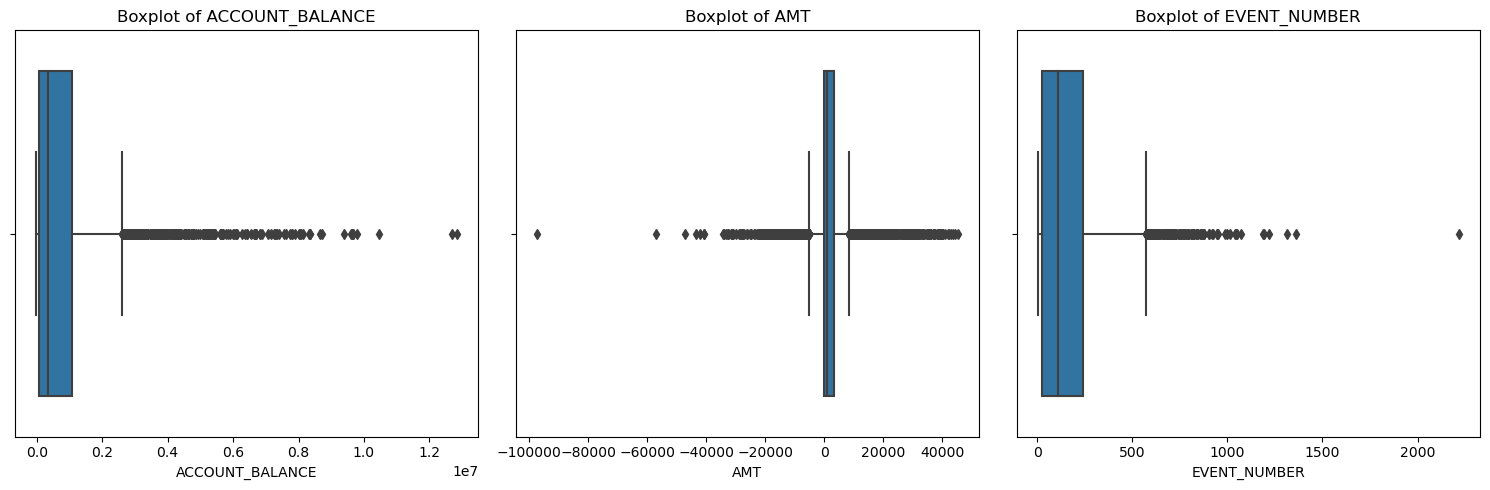

In [155]:

# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(131)
sns.boxplot(x=train_data['ACCOUNT_BALANCE'])
plt.title('Boxplot of ACCOUNT_BALANCE')

# Second subplot
plt.subplot(132)
sns.boxplot(x=train_data['AMT'])
plt.title('Boxplot of AMT')

# Third subplot
plt.subplot(133)
sns.boxplot(x=train_data['EVENT_NUMBER'])
plt.title('Boxplot of EVENT_NUMBER')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

# log transformation

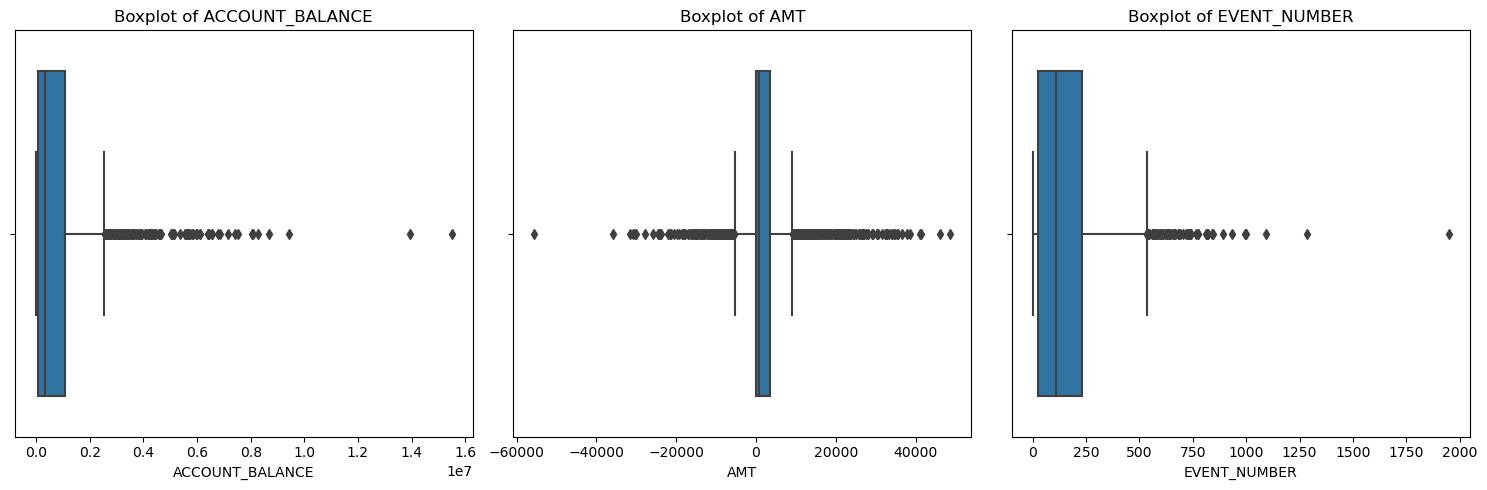

In [157]:

# Create a 1x3 grid of subplots
plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(131)
sns.boxplot(x=test_data['ACCOUNT_BALANCE'])
plt.title('Boxplot of ACCOUNT_BALANCE')

# Second subplot
plt.subplot(132)
sns.boxplot(x=test_data['AMT'])
plt.title('Boxplot of AMT')

# Third subplot
plt.subplot(133)
sns.boxplot(x=test_data['EVENT_NUMBER'])
plt.title('Boxplot of EVENT_NUMBER')

# Adjust the layout to avoid overlapping titles
plt.tight_layout()

# Show the plots
plt.show()

In [160]:
train_data = train_data.replace({'PRODUCT_CODE' : { 'CHEQ' : 0, 'SAVE' : 2}})
train_data = train_data.replace({'CHANNEL' : { 'system' : 0, 'atm' : 2, 'internet' : 3, 'teller' : 4}})
train_data.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,DECLARED_NET_INCOME,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_000e300f38e067ac4f06255d4ff31010c3b3c6490f1...,2022-06,15500.0,1895914.58,487.77,399,0,0,1,128,2022-09,1,14,12.0,1,43
1,ID_000fb7f238953e9adc91e3b15584dca6d7004d6ba4a...,2022-04,13400.0,543630.70,-2765.15,121,2,0,1,8,2022-08,0,12,11.0,1,50
2,ID_001d82dc1e7387cd0d9ba634af27d79070d6f483167...,2022-06,12500.0,1103103.43,-1463.02,186,0,0,1,84,2022-09,0,13,22.0,1,37
3,ID_001e0135a8c795bcacf30315d447cfdb20bcdc170c6...,2022-03,18000.0,20293.15,14243.15,3,2,3,1,1,2022-04,0,14,4.0,1,32
4,ID_0044eb445a044d699fc14474a2d4b1c438aec0f4905...,2022-08,22000.0,63671.42,0.16,15,0,2,1,9,2022-09,1,13,5.0,1,51


In [161]:
test_data = test_data.replace({'PRODUCT_CODE' : { 'CHEQ' : 0, 'SAVE' : 2}})
test_data = test_data.replace({'CHANNEL' : { 'system' : 0, 'atm' : 2, 'internet' : 3, 'teller' : 4}})
test_data.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_00306a10bf82ce30b11abb32b94a08aebac968ff13a...,2022-07,3925140.55,33257.79,259,2,0,1,1,2022-07,0,2,6.0,1,32
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,1700.00,700.00,2,0,2,1,2,2022-09,1,17,19.0,1,28
2,ID_0073f579e132913abb5c95bc2dc256f52987c0a7235...,2022-08,322534.07,2203.67,45,0,0,2,22,2022-08,0,14,5.0,1,37
3,ID_00914066d14b7685d4ad2e6ca04f019fdf14971caa3...,2022-04,881660.97,2858.06,327,0,0,1,85,2022-09,1,13,8.0,1,33
4,ID_00988cf57ecbaf4a3b51f07fae36134361bfd8f0607...,2022-05,3132751.48,-12900.98,330,0,0,1,133,2022-07,1,12,8.0,1,49


In [162]:
columns_to_encode = ['CUSTOMER_IDENTIFIER']

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in columns_to_encode:
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Display the updated DataFrame
train_data.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,DECLARED_NET_INCOME,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,0,2022-06,15500.0,1895914.58,487.77,399,0,0,1,128,2022-09,1,14,12.0,1,43
1,1,2022-04,13400.0,543630.70,-2765.15,121,2,0,1,8,2022-08,0,12,11.0,1,50
2,2,2022-06,12500.0,1103103.43,-1463.02,186,0,0,1,84,2022-09,0,13,22.0,1,37
3,3,2022-03,18000.0,20293.15,14243.15,3,2,3,1,1,2022-04,0,14,4.0,1,32
4,4,2022-08,22000.0,63671.42,0.16,15,0,2,1,9,2022-09,1,13,5.0,1,51


In [163]:
train_data.isna().sum()

CUSTOMER_IDENTIFIER         0
RECORD_DATE_x               0
DECLARED_NET_INCOME         0
ACCOUNT_BALANCE             0
AMT                         0
EVENT_NUMBER                0
PRODUCT_CODE                0
CHANNEL                     0
ACCOUNT_NUMBER              0
TRANSACTION_REFERENCE       0
DATE_LAST_UPDATED           0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
dtype: int64

In [164]:
# Convert RECORD_DATE_x to datetime with handling invalid dates
train_data['RECORD_DATE_x'] = pd.to_datetime(train_data['RECORD_DATE_x'], errors='coerce')

# Split RECORD_DATE into month, day, and year columns
train_data['Month'] = train_data['RECORD_DATE_x'].dt.month
train_data['Day'] = train_data['RECORD_DATE_x'].dt.day
train_data['Year'] = train_data['RECORD_DATE_x'].dt.year

In [165]:
train_data = train_data.drop(['RECORD_DATE_x','DATE_LAST_UPDATED'], axis=1)

In [166]:
columns_to_encode = ['CUSTOMER_IDENTIFIER','ACCOUNT_NUMBER','TRANSACTION_REFERENCE']

# Create the LabelEncoder object
label_encoder = LabelEncoder()

# Iterate over each column in the list and encode the values
for col in columns_to_encode:
    test_data[col] = label_encoder.fit_transform(test_data[col])

# Display the updated DataFrame
test_data.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,0,2022-07,3925140.55,33257.79,259,2,0,0,0,2022-07,0,2,6.0,1,32
1,1,2022-06,1700.00,700.00,2,0,2,0,1,2022-09,1,17,19.0,1,28
2,2,2022-08,322534.07,2203.67,45,0,0,1,21,2022-08,0,14,5.0,1,37
3,3,2022-04,881660.97,2858.06,327,0,0,0,82,2022-09,1,13,8.0,1,33
4,4,2022-05,3132751.48,-12900.98,330,0,0,0,126,2022-07,1,12,8.0,1,49


In [167]:
test_data['RECORD_DATE_x'] = pd.to_datetime(test_data['RECORD_DATE_x'], errors='coerce')
# Split RECORD_DATE into month, day, and year columns
test_data['Month'] = test_data['RECORD_DATE_x'].dt.month
test_data['Day'] = test_data['RECORD_DATE_x'].dt.day
test_data['Year'] = test_data['RECORD_DATE_x'].dt.year

In [168]:
test_data = test_data.drop(['RECORD_DATE_x', 'DATE_LAST_UPDATED'], axis=1)

<Axes: >

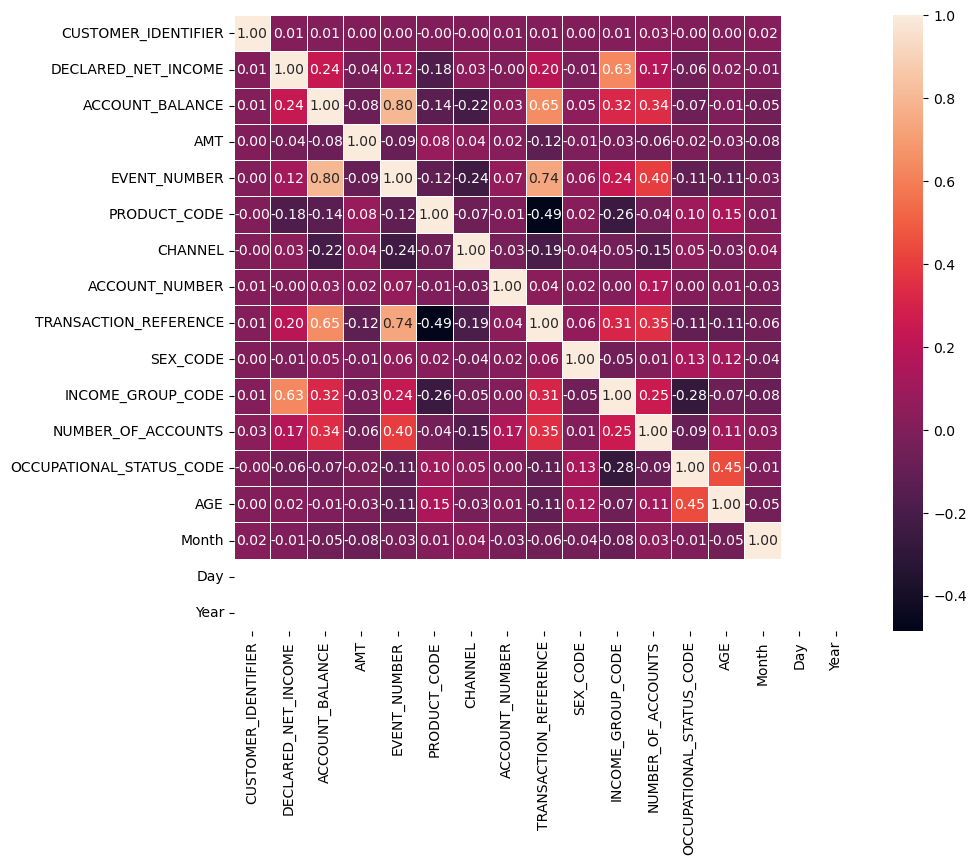

In [169]:
## Create a correlation matrix (if applicable) or any 2D data to be plotted as a heatmap
correlation_matrix = train_data.corr()  # Replace 'data' with your DataFrame if you want to plot the correlation matrix

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as per your preference
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)

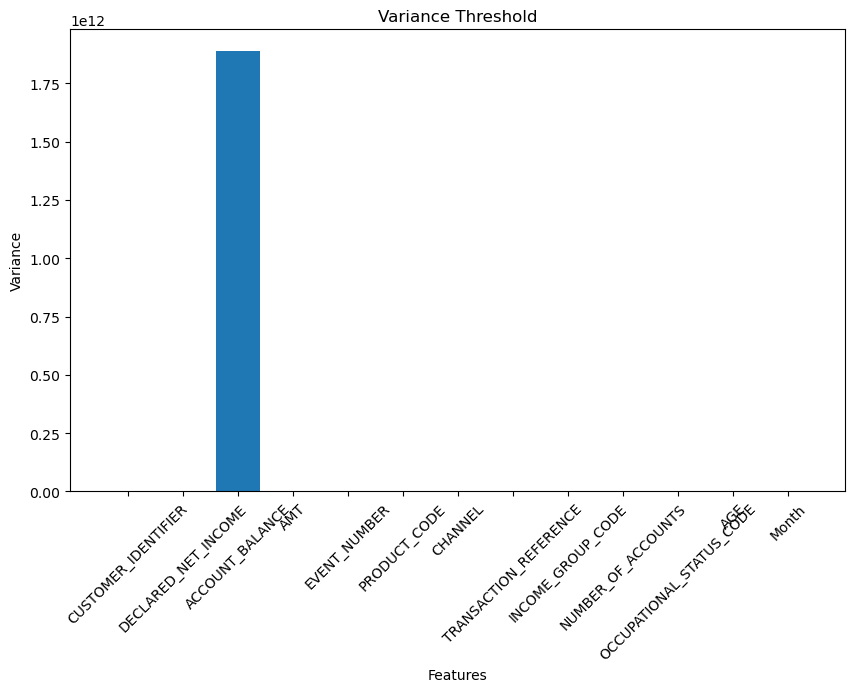

In [170]:
threshold = 0.45

#Apply variance threshold to remove low-variance features
variance_selector = VarianceThreshold(threshold=threshold)
df_filtered = variance_selector.fit_transform(train_data)

#Get the feature indices after filtering
selected_feature_indices = np.where(variance_selector.variances_ > threshold)[0]

#Get the variances of the remaining features
selected_feature_variances = variance_selector.variances_[selected_feature_indices]

#Plot the variance of the features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_variances)), selected_feature_variances)
plt.xticks(range(len(selected_feature_variances)), train_data.columns[selected_feature_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance Threshold')
plt.show()

In [172]:
train_data = train_data.drop(columns=['AMT','SEX_CODE','EVENT_NUMBER','TRANSACTION_REFERENCE','ACCOUNT_NUMBER','CHANNEL','INCOME_GROUP_CODE','OCCUPATIONAL_STATUS_CODE','Month','Day','Year','PRODUCT_CODE'])
test_data = test_data.drop(columns=['AMT', 'SEX_CODE', 'EVENT_NUMBER','TRANSACTION_REFERENCE','ACCOUNT_NUMBER','CHANNEL','INCOME_GROUP_CODE','OCCUPATIONAL_STATUS_CODE','Month','Day','Year','PRODUCT_CODE'])



In [173]:
train_data['ACCOUNT_BALANCE'] = train_data['ACCOUNT_BALANCE'].round(2)
test_data['ACCOUNT_BALANCE'] = test_data['ACCOUNT_BALANCE'].round(2)

In [174]:
train_data.head()

,CUSTOMER_IDENTIFIER,DECLARED_NET_INCOME,ACCOUNT_BALANCE,NUMBER_OF_ACCOUNTS,AGE
0,0,15500.0,1895914.58,12.0,43
1,1,13400.0,543630.70,11.0,50
2,2,12500.0,1103103.43,22.0,37
3,3,18000.0,20293.15,4.0,32
4,4,22000.0,63671.42,5.0,51


## Training

In [175]:
# Prepare the data for training
X_train = train_data.drop(columns=['CUSTOMER_IDENTIFIER','DECLARED_NET_INCOME'])
y_train = train_data['DECLARED_NET_INCOME']

In [176]:
import statsmodels.api as sm
def backward_regression(X_train, y_train,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X_train.columns)
    while True:
        changed=False
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop  with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

backward_regression(X_train, y_train)

Drop  with p-value 


['ACCOUNT_BALANCE', 'NUMBER_OF_ACCOUNTS']

## RandomForestRegressor

In [177]:
# Initialize the model 
model = RandomForestRegressor()


In [178]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor()

In [179]:
X_test = test_data.drop('CUSTOMER_IDENTIFIER', axis=1)

In [180]:
# Make predictions
predicted_income = model.predict(X_test)

In [181]:
predicted_income

array([18004., 34666., 11077., ...,  7069., 12761., 15947.])

In [182]:
print(r2_score(y_train, model.predict(X_train)))

0.8636671891767576


In [183]:
# Create a DataFrame with customer_id and predicted income
submission_df = pd.DataFrame({'CUSTOMER_IDENTIFIER': test_data['CUSTOMER_IDENTIFIER'], 'predicted_income': predicted_income})


In [184]:
# Save the submission file to a CSV
submission_df.to_csv('submission.csv', index=False)

In [185]:
sub = pd.read_csv('submission.csv')
sub

,CUSTOMER_IDENTIFIER,predicted_income
0,0,18004.0
1,1,34666.0
2,2,11077.0
3,3,15459.0
4,4,21878.0
...,...,...
1539,1539,9437.0
1540,1540,15940.0
1541,1541,7069.0
1542,1542,12761.0


## KNeighbors Regressor

In [186]:
# Initialize the model 
knn = KNeighborsRegressor(n_neighbors=5)
# Train the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [187]:
# Make predictions
pred_income = knn.predict(X_test)

In [188]:
pred_income

array([18020.,  9540.,  8020., ..., 12200.,  8920., 18100.])

## Checking for accuracy

In [189]:
print(r2_score(y_train, knn.predict(X_train)))

0.2915915510284852


## Decision Tree

In [190]:
# Initialize the model 
dt = DecisionTreeRegressor()
# Train the model
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [191]:
# Make predictions
dt_pred = dt.predict(X_test)

In [192]:
dt_pred

array([21200., 42600.,  6600., ...,  7500.,  5000., 14300.])

In [193]:
print(r2_score(y_train, dt.predict(X_train)))

0.999974371743138


In [194]:
import pickle

In [195]:
# Specify the file path where you want to save each model
random_forest_file = 'RandomForestRegressor.pkl'
KNeighbors_Regressor = 'KNeighbors .pkl'
Decision_tree = 'DecisionTree.pkl'


# Save each model as a pickle file
try:
    with open(random_forest_file, 'wb') as file:
        pickle.dump(model, file)
    print(f"Random Forest model saved as {random_forest_file} successfully.")

    with open(KNeighbors_Regressor, 'wb') as file:
        pickle.dump(knn, file)
    print(f"KNeighbors_Regressor model saved as {KNeighbors_Regressor} successfully.")

    with open(Decision_tree, 'wb') as file:
        pickle.dump(dt, file)
    print(f"Decision_tree model saved as {Decision_tree} successfully.")

except Exception as e:
    print(f"Error saving the model: {str(e)}")

Random Forest model saved as RandomForestRegressor.pkl successfully.
KNeighbors_Regressor model saved as KNeighbors .pkl successfully.
Decision_tree model saved as DecisionTree.pkl successfully.
